# Assignment 1: Benchmarking Neural Nets with the XOR Problem

### DS 6050 - School of Data Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For deliverables, you must write code in Python/Pytorch and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 80 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_1_ann.ipynb**.



In [1]:
# You might want to use the following packages
import numpy as np
import os
import torch
print(torch.__version__)
import torch.nn.functional as F
import torch.nn as nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

1.12.1


---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the `train / validate / test` sets. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


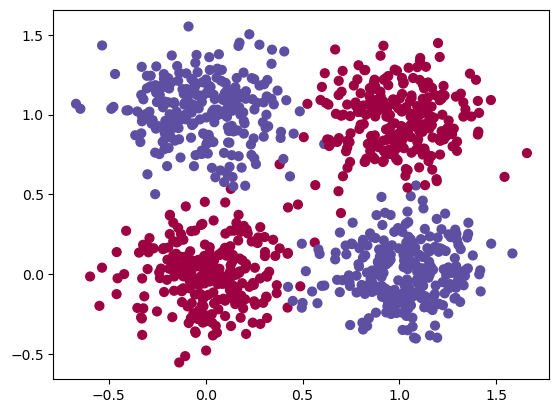

In [2]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])

X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)
X_val = torch.from_numpy(X_val)
y_val = torch.from_numpy(y_val)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [4]:
class net(nn.Module):
  def __init__(self):
        super(net, self).__init__()
        self.input_layer = nn.Linear(2, 5)
        self.hidden_layer = nn.Linear(5, 5)
        self.output_layer = nn.Linear(5, 1)

  def forward(self, x):
        x = torch.relu(self.input_layer(x))
        x = torch.relu(self.hidden_layer(x))
        x = torch.tanh(self.output_layer(x))
        return x
  
model = net()
  
  # Your code here!
  # TODO: implement a customized module using establised functions from pytorch
  # Loss can be calculated with nn.BCEWithLogitsLoss()
  # Linear layer could be added to the model with nn.linear()
  # Hyperbolic tangent can be achieved with torch.tanh()
  # Use any optimizer to optimize model parameters
  # An example can be found at: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

In [5]:
learning_rate = 1e-3
batch_size = 20
num_epochs = 50
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [6]:
for epoch in range(num_epochs):
    # forward pass
    outputs = model(X_val.float())
    loss = loss_fn(outputs, y_val.view(-1, 1).float())

    # backward pass
    loss_fn.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 0.6766
Epoch [2/50], Loss: 0.6766
Epoch [3/50], Loss: 0.6766
Epoch [4/50], Loss: 0.6766
Epoch [5/50], Loss: 0.6766
Epoch [6/50], Loss: 0.6765
Epoch [7/50], Loss: 0.6765
Epoch [8/50], Loss: 0.6764
Epoch [9/50], Loss: 0.6764
Epoch [10/50], Loss: 0.6763
Epoch [11/50], Loss: 0.6763
Epoch [12/50], Loss: 0.6762
Epoch [13/50], Loss: 0.6761
Epoch [14/50], Loss: 0.6760
Epoch [15/50], Loss: 0.6759
Epoch [16/50], Loss: 0.6758
Epoch [17/50], Loss: 0.6757
Epoch [18/50], Loss: 0.6756
Epoch [19/50], Loss: 0.6755
Epoch [20/50], Loss: 0.6754
Epoch [21/50], Loss: 0.6752
Epoch [22/50], Loss: 0.6751
Epoch [23/50], Loss: 0.6750
Epoch [24/50], Loss: 0.6748
Epoch [25/50], Loss: 0.6747
Epoch [26/50], Loss: 0.6745
Epoch [27/50], Loss: 0.6744
Epoch [28/50], Loss: 0.6742
Epoch [29/50], Loss: 0.6740
Epoch [30/50], Loss: 0.6739
Epoch [31/50], Loss: 0.6737
Epoch [32/50], Loss: 0.6735
Epoch [33/50], Loss: 0.6733
Epoch [34/50], Loss: 0.6732
Epoch [35/50], Loss: 0.6730
Epoch [36/50], Loss: 0.6728
E

In [7]:
with torch.no_grad():
    outputs = model(X_test.float())
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_test.view(-1, 1)).float().mean()
    print(f'Accuracy on the validation set: {accuracy.item()*100:.2f}%')

Accuracy on the validation set: 48.50%


- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [8]:
#Now that you see how the standard library ANN performs on the XOR dataset,
#you will attempt to implement your own version of the neural network.
#To help you, a template has been created including the backpropagation.
#Essensially, you will get the backward gradients for free.
#However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer.
#There are some subtasks which you need to implement in order to get the network to work properly.

from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """
        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.randn(n0, n1)
        self.b1 = np.random.randn(1, n1)
        self.W2 = np.random.randn(n1, n2)
        self.b2 = np.random.randn(1, n2)
        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse_output=False)

    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer
        # and softmax for the output layer
        Z1 = np.dot(X.T, self.W1) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = np.exp(Z2 - np.max(Z2)) / np.sum(np.exp(Z2 - np.max(Z2)))
        return A1, A2

    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """
        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        L = -np.sum(Y.T * np.log(A2))
        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """
        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        # feel free to cross check the calculated gradients with autograd from Pytorch
        # Ref document: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
        m   = y.shape[0]
        dZ2 = A2 - self.one_hot(y).T
        dW2 = np.dot(A1.T, dZ2)/m
        db2 = np.sum(dZ2, axis=0, keepdims=True)/m
        dZ1 = np.multiply( np.dot(dZ2, self.W2.T), 1-np.power( A1, 2))
        dW1 = np.dot(X, dZ1)/m
        db1 = (np.sum(dZ1, axis=0, keepdims=True)/m)
        return dW1, db1, dW2, db2

    def fit(self, X, y , epochs, X_val, y_val):
        """
        Learns parameters for the neural network and returns the model.

        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """
        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):
        # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)

        # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

        # Step 3: Gradient Descent
            self.W1 -= self.alpha * dW1
            self.b1 -= self.alpha * db1
            self.W2 -= self.alpha * dW2
            self.b2 -= self.alpha * db2

            if i % 1 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f" 
                      %(i, epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val, y_val)))

            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            # A1, A2 =

            # Step 2: Backward pass
            # dW1, db1, dW2, db2 =

            # Step 3: Gradient Descent
            # self.W1 =
            # self.b1 =
            # self.W2 =
            # self.b2 =

            # Print the loss and validation accuracy every 10 epochs.

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T

        # SUBTASK 5: Implement the prediction process.
        # Hint: It should include a forward pass, and then use the class with higher probability.
        # y_hat =
        A1, A2 = self.forward_pass(X)
        y_hat = np.argmax(A2, axis = 1)
        return y_hat

    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        y_array = np.array(y).flatten() 

        return np.sum(y_array == y_hat)/m

    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))
        return Y.T # Transpose to get into same shape 1 x m

    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version.

Epoch 0/50 - loss: 5512.207292 - accuracy: 0.723611 - val_loss: 448.622811 - val_accuracy: 0.662500
Epoch 1/50 - loss: 5511.743040 - accuracy: 0.723611 - val_loss: 448.562490 - val_accuracy: 0.662500
Epoch 2/50 - loss: 5511.278863 - accuracy: 0.723611 - val_loss: 448.502206 - val_accuracy: 0.662500
Epoch 3/50 - loss: 5510.814766 - accuracy: 0.723611 - val_loss: 448.441961 - val_accuracy: 0.662500
Epoch 4/50 - loss: 5510.350755 - accuracy: 0.723611 - val_loss: 448.381754 - val_accuracy: 0.662500
Epoch 5/50 - loss: 5509.886835 - accuracy: 0.723611 - val_loss: 448.321585 - val_accuracy: 0.662500
Epoch 6/50 - loss: 5509.423012 - accuracy: 0.723611 - val_loss: 448.261457 - val_accuracy: 0.662500
Epoch 7/50 - loss: 5508.959292 - accuracy: 0.722222 - val_loss: 448.201368 - val_accuracy: 0.662500
Epoch 8/50 - loss: 5508.495681 - accuracy: 0.722222 - val_loss: 448.141320 - val_accuracy: 0.662500
Epoch 9/50 - loss: 5508.032183 - accuracy: 0.720833 - val_loss: 448.081313 - val_accuracy: 0.662500


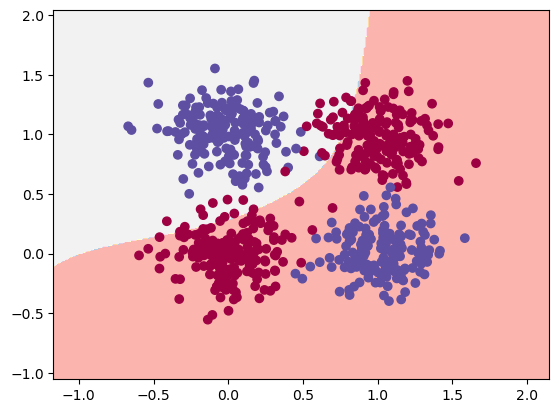

In [9]:
# MODEL 1 here
n0 = 2
n1 = 4
n2 = 2
alpha = 1e-3
epochs = 50

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha)
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

Epoch 0/50 - loss: 12309.817905 - accuracy: 0.486111 - val_loss: 1123.800027 - val_accuracy: 0.587500
Epoch 1/50 - loss: 12309.761116 - accuracy: 0.486111 - val_loss: 1123.794986 - val_accuracy: 0.587500
Epoch 2/50 - loss: 12309.704328 - accuracy: 0.486111 - val_loss: 1123.789944 - val_accuracy: 0.587500
Epoch 3/50 - loss: 12309.647540 - accuracy: 0.486111 - val_loss: 1123.784902 - val_accuracy: 0.587500
Epoch 4/50 - loss: 12309.590752 - accuracy: 0.486111 - val_loss: 1123.779861 - val_accuracy: 0.587500
Epoch 5/50 - loss: 12309.533965 - accuracy: 0.486111 - val_loss: 1123.774819 - val_accuracy: 0.587500
Epoch 6/50 - loss: 12309.477177 - accuracy: 0.486111 - val_loss: 1123.769778 - val_accuracy: 0.587500
Epoch 7/50 - loss: 12309.420391 - accuracy: 0.486111 - val_loss: 1123.764736 - val_accuracy: 0.587500
Epoch 8/50 - loss: 12309.363604 - accuracy: 0.486111 - val_loss: 1123.759695 - val_accuracy: 0.587500
Epoch 9/50 - loss: 12309.306818 - accuracy: 0.486111 - val_loss: 1123.754653 - val

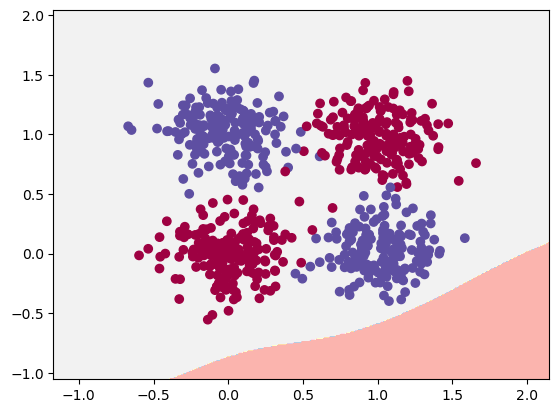

In [10]:
# MODEL 2 here
n0 = 2
n1 = 100
n2 = 2
alpha = 1e-5
epochs = 50

myModel1 = MyNeuralNet(n0, n1, n2, alpha)
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

myModel1.plot_decision_boundary(X_train, y_train)

Epoch 0/50 - loss: 7518.897992 - accuracy: 0.708333 - val_loss: 613.556296 - val_accuracy: 0.750000
Epoch 1/50 - loss: 7518.897993 - accuracy: 0.708333 - val_loss: 613.556296 - val_accuracy: 0.750000
Epoch 2/50 - loss: 7518.897994 - accuracy: 0.708333 - val_loss: 613.556296 - val_accuracy: 0.750000
Epoch 3/50 - loss: 7518.897995 - accuracy: 0.708333 - val_loss: 613.556296 - val_accuracy: 0.750000
Epoch 4/50 - loss: 7518.897996 - accuracy: 0.708333 - val_loss: 613.556296 - val_accuracy: 0.750000
Epoch 5/50 - loss: 7518.897996 - accuracy: 0.708333 - val_loss: 613.556297 - val_accuracy: 0.750000
Epoch 6/50 - loss: 7518.897997 - accuracy: 0.708333 - val_loss: 613.556297 - val_accuracy: 0.750000
Epoch 7/50 - loss: 7518.897998 - accuracy: 0.708333 - val_loss: 613.556297 - val_accuracy: 0.750000
Epoch 8/50 - loss: 7518.897999 - accuracy: 0.708333 - val_loss: 613.556297 - val_accuracy: 0.750000
Epoch 9/50 - loss: 7518.897999 - accuracy: 0.708333 - val_loss: 613.556297 - val_accuracy: 0.750000


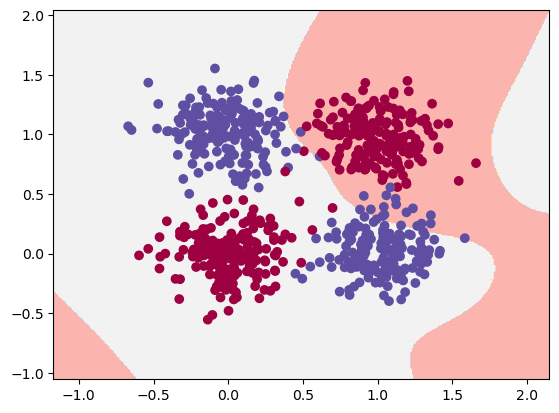

In [11]:
# MODEL 3 here
n0 = 2
n1 = 300
n2 = 2
alpha = 1e-10
epochs = 50

myModel1 = MyNeuralNet(n0, n1, n2, alpha)
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

myModel1.plot_decision_boundary(X_train, y_train)

## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My own hand-coded network performed similarly when using similar parameter values as the network is part 2. My own network's performance was improved, however, when altering the parameter values to increase accuracy. The number of nodes in the network's hidden layer, in particular, seem to have a large effect on the performance of my network. It is hard to evaluate the specific differences between the two implementations without seeing a graph of the decision boundary for the network in part 2, though. This assignment definitely helped increase my understanding of the inner workings of an ANN, specifically the interaction between the forward and backward passes. It was also a difficult proccess at first to hand code the processes of an established that I wasn't familiar with until the start of this class.

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lecture slides on Module 2.
 * Post a question in Piazza.
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <vga8uf@virginia.edu> with subject starting "DS 6050 Assignment 1:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!